# figure2b: undersampling

In [2]:
#requirements
import sys
sys.path.append("../../src")
from infernal_tools import CMReader
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from metric_helper.cmalign_tools import get_unique_valid_novel, score_parser

rfams=!ls ../../outputs/undersample_1
print(rfams)
print(len(rfams))

['RF00001', 'RF00003', 'RF00004', 'RF00005', 'RF00017', 'RF00029', 'RF00059', 'RF00100', 'RF00163', 'RF00174', 'RF00177', 'RF00230', 'RF00906', 'RF00994', 'RF01960', 'RF02271', 'RF04021', 'RF04088']
18


In [3]:
# cmalign
# from preprocess import cmalign

# for rfam in rfams:
#     fasta_files = !ls ../../outputs/undersample_*/{rfam}/*fa
#     for fasta in fasta_files:
#         try:

#             cmfiles = !ls ../../datasets/ForFigure2/{rfam}*/*cm
#             cmfile = cmfiles[0]
            # print(cmfile)
            # print(fasta)
            # cmalign(
            #     cmfile = cmfile,
            #     seqfile = fasta,
            #     log = True, 
            #     trunc = False, 
            #     suffix = "_notrunc",
            #     cpu = 7
            # );
        # except:
            # print(fasta)
            # pass


In [4]:
size = "00142"
rfam = "RF00005"
dirname = "undersample_1"
!ls ../../outputs/{dirname}/{rfam}/*cmvae*{size}*score.txt
!ls ../../outputs/{dirname}/{rfam}/sampling_cmvae_{rfam}_{size}_.fa
!ls ../../datasets/{dirname}/{rfam}/*{size}.fa

../../outputs/undersample_1/RF00005/sampling_cmvae_RF00005_00142__notrunc_score.txt
../../outputs/undersample_1/RF00005/sampling_cmvae_RF00005_00142_.fa
../../datasets/undersample_1/RF00005/RF00005_unique_seed_removed_sampled00142.fa


In [5]:
def get_summary(dirname):
    log_cm_rfam2res = {}
    log_gc_rfam2res = {}

    for rfam in rfams:
        # rfam = "RF00001"
        sizes = ["00142", "00285", "00428", "00571", "00714", "01428", "02857", "07142"]

        cmfile = !find ../../datasets/ForFigure2/{rfam}*/{rfam}.cm
        cmfile = cmfile[0]
        cmr = CMReader(cmfile)
        GA_THRESHOLD = cmr.GA_THRESHOLD

        log_cm, log_gc = {}, {}

        for size in sizes:
            try: 
                trainfa_cm = !ls ../../datasets/{dirname}/{rfam}/*{size}.fa
                trainfa_cm = trainfa_cm[0]
                # print(trainfa_cm)

                samplefa = !ls ../../outputs/{dirname}/{rfam}/sampling_cmvae_{rfam}_{size}_.fa
                samplefa = samplefa[0]
                # print(samplefa)

                score = !ls ../../outputs/{dirname}/{rfam}/*cmvae*{size}*score.txt
                score = score[0]
                #print(score)

                total, valid, novel = get_unique_valid_novel(trainfa_cm, samplefa, score, GA_THRESHOLD)
                # print(len(total))
                log_cm[size] = {"unique": len(total), "valid": len(valid), "novel": len(novel), "res": len(novel)/len(total), "all_score": total} 


                # gcave
                trainfa_gc = !ls ../../datasets/{dirname}/{rfam}/*{size}*gap0.5.fa
                trainfa_gc = trainfa_gc[0]
                # print(trainfa_cm)

                samplefa = !ls ../../outputs/{dirname}/{rfam}/sampling_gcvae_{rfam}_{size}_.fa
                samplefa = samplefa[0]
                # print(samplefa)

                score = !ls ../../outputs/{dirname}/{rfam}/*gcvae*{size}*score.txt
                score = score[0]
                all_scores = score_parser(score)

                total, valid, novel = get_unique_valid_novel(trainfa_gc, samplefa, score, GA_THRESHOLD)
                log_gc[size] = {"unique": len(total), "valid": len(valid), "novel": len(novel), "res": len(novel)/len(total), "all_score": all_scores} 
            except: 
                pass
        log_cm_rfam2res[rfam] = log_cm
        log_gc_rfam2res[rfam] = log_gc
    return log_gc_rfam2res, log_cm_rfam2res


In [6]:
tmp = !ls ../../outputs/
undersamples = [f for f in tmp if ("undersample" in f) and (not "zip" in f)]
print(undersamples)


log_all = [[*get_summary(u)] for u in undersamples]


['undersample', 'undersample_0', 'undersample_1', 'undersample_2', 'undersample_3']


In [8]:
log_all[0][0]["RF00001"]["00142"]["all_score"]["seq0"]
log_all[0][0].keys()

dict_keys(['RF00001', 'RF00003', 'RF00004', 'RF00005', 'RF00017', 'RF00029', 'RF00059', 'RF00100', 'RF00163', 'RF00174', 'RF00177', 'RF00230', 'RF00906', 'RF00994', 'RF01960', 'RF02271', 'RF04021', 'RF04088'])

In [9]:
n_samples =  [100, 200, 300, 400, 500, 1000, 2000, 5000]
all_bit_cm = []
all_bit_gc = []

for i in log_all:

    bit_cm = {}
    bit_gc = {}

    for rfam, resdict in i[1].items():
        bit_cm[rfam] = {}
        for size, ress in resdict.items():
            bit_cm[rfam][size] = np.mean(list(ress["all_score"].values()))

    for rfam, resdict in i[0].items():
        bit_gc[rfam] = {}
        for size, ress in resdict.items():
            bit_gc[rfam][size] = np.mean(list(ress["all_score"].values()))


    bit_cm = pd.DataFrame(bit_cm)
    bit_cm.index = [100, 200, 300, 400, 500, 1000, 2000, 5000]
    bit_gc = pd.DataFrame(bit_gc)
    bit_gc.index = [100, 200, 300, 400, 500, 1000, 2000, 5000]

    # res_cm.T.to_csv("../outputs/EXP08/EXP08-06/result_cmvae.csv")
    # res_gc.T.to_csv("../outputs/EXP08/EXP08-06/result_gcvae.csv")

    all_bit_cm.append(bit_cm)
    all_bit_gc.append(bit_gc)


In [10]:
all_bit_cm[0]

,RF00001,RF00003,RF00004,RF00005,RF00017,RF00029,RF00059,RF00100,RF00163,RF00174,RF00177,RF00230,RF00906,RF00994,RF01960,RF02271,RF04021,RF04088
100,119.76210,132.038696,176.72891,NaN,52.96738,67.440560,85.34180,331.41001,53.814779,147.46904,1596.80826,152.31757,128.315433,80.929009,1271.34280,179.833105,45.982214,190.47342
200,119.68242,165.935500,175.93675,NaN,159.26551,61.973560,82.20773,330.30978,46.192823,146.10051,1685.27670,166.93806,149.533431,82.858333,1797.61399,184.190929,62.865616,209.17356
300,119.90790,162.423200,185.97218,NaN,-2.27493,55.480560,84.68361,283.32808,46.512122,143.13742,1699.65044,151.26072,140.717460,88.274091,1815.52331,186.770162,69.173002,165.71362
400,119.51629,159.438370,192.94771,NaN,154.36968,73.937690,83.03557,245.72552,23.142500,149.20748,1616.26200,140.55634,142.904090,86.444421,NaN,187.622644,49.254876,137.54419
500,123.63779,152.050930,190.74593,NaN,268.14304,44.290932,87.45293,NaN,47.100147,NaN,1617.77956,NaN,149.072570,76.232500,NaN,187.061745,75.808991,NaN
1000,117.55727,155.120560,190.90476,NaN,285.85651,78.810600,90.18725,294.76341,55.415243,151.24897,1674.87678,154.35957,151.585480,89.036082,NaN,186.175985,52.548044,215.99312
2000,121.28110,153.338809,188.49905,NaN,282.98722,67.347525,85.33139,324.37509,44.747970,109.59720,NaN,170.72605,140.365170,86.075717,NaN,190.992835,75.690412,193.94870
5000,123.65491,NaN,NaN,NaN,292.53893,70.042140,88.23683,359.54619,42.196936,NaN,NaN,161.22124,141.568490,88.102081,NaN,188.854544,77.386376,212.25837


/Users/sumishunsuke/opt/miniconda3/envs/genzyme/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/Users/sumishunsuke/opt/miniconda3/envs/genzyme/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/Users/sumishunsuke/opt/miniconda3/envs/genzyme/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/sumishunsuke/opt/miniconda3/envs/genzyme/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/Users/sumishunsuke/opt/miniconda3/envs/genzyme/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/Users/sumishunsuke/opt/miniconda3/envs/genzyme/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/Users/sumishunsuke/opt/miniconda3/envs/genzyme/lib/pyt

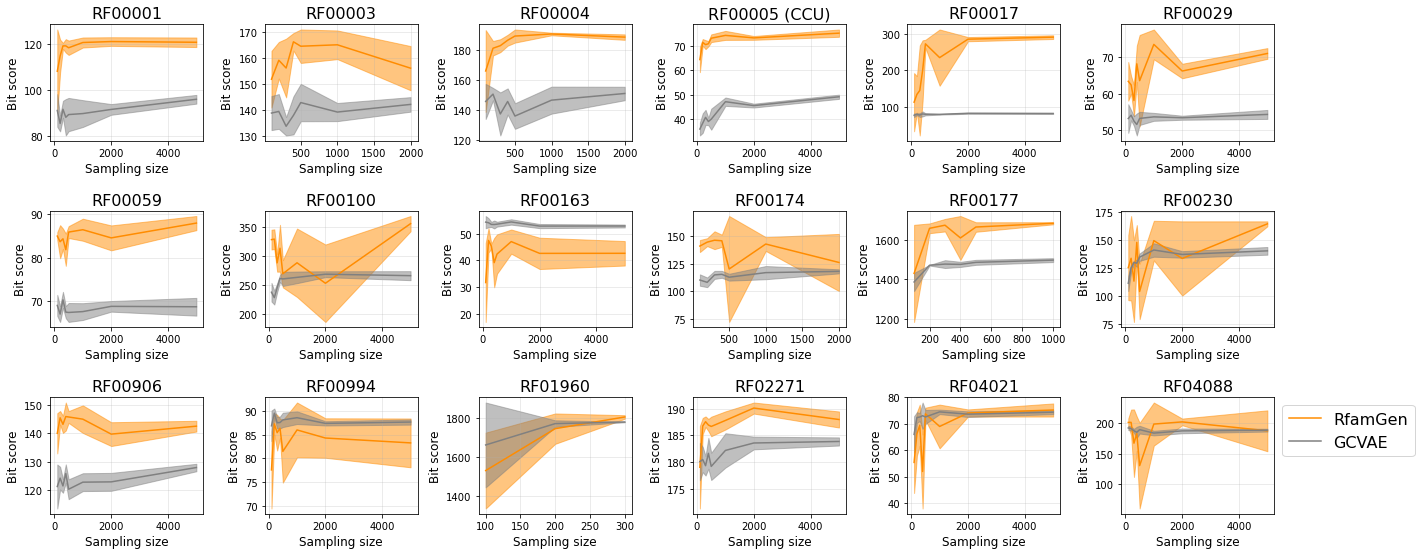

In [20]:
color_rfamgen = "darkorange"
color_gcvae = "gray"
alpha = 0.5

fig = plt.figure(figsize=(20 ,8))

i = 0
for rf in bit_cm.columns:
    ax = fig.add_subplot(3, 6, 1+i)
    ax.plot(n_samples, [np.nanmean([all_bit_cm[i][rf][n] for i in range(5)]) for n in n_samples], label = "RfamGen", color = color_rfamgen);
    ax.fill_between(
        n_samples,
        [np.nanmean([all_bit_cm[i][rf][n] for i in range(5)]) - np.nanstd([all_bit_cm[i][rf][n] for i in range(5)]) for n in n_samples],
        [np.nanmean([all_bit_cm[i][rf][n] for i in range(5)]) + np.nanstd([all_bit_cm[i][rf][n] for i in range(5)]) for n in n_samples],
        color = color_rfamgen,
        alpha = alpha
    );

    ax.plot(n_samples, [np.nanmean([all_bit_gc[i][rf][n] for i in range(5)]) for n in n_samples], label = "GCVAE", color = color_gcvae);
    ax.fill_between(
        n_samples,
        [np.nanmean([all_bit_gc[i][rf][n] for i in range(5)]) - np.nanstd([all_bit_gc[i][rf][n] for i in range(5)]) for n in n_samples],
        [np.nanmean([all_bit_gc[i][rf][n] for i in range(5)]) + np.nanstd([all_bit_gc[i][rf][n] for i in range(5)]) for n in n_samples],
        color = color_gcvae,
        alpha = alpha
    );
    
    cmfile = !find ../../datasets/ForFigure2/{rf}*/{rf}.cm
    cmfile = cmfile[0]
    cmr = CMReader(cmfile)
    GA_THRESHOLD = cmr.GA_THRESHOLD
    # plt.axhline(y=GA_THRESHOLD, xmin=0, xmax=5000, linestyle = "dashed", color = "red", label = "GA threshold")


    ax.grid(alpha = 0.3)
    # plt.xticks(rotation= 15)
    ax.set_xlabel("Sampling size", fontsize = 12)
    ax.set_ylabel("Bit score", fontsize = 12)
    ax.set_title(rf if not rf == "RF00005" else "RF00005 (CCU)", fontsize = 16)
    i +=1
    
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend(fontsize = 16, bbox_to_anchor=(1, 1))
plt.subplots_adjust(left=0.05, right=0.9, bottom=0.1, top=0.95)

plt.savefig("../../outputs/figures/figure2b.pdf",transparent = True)
plt.show()